In [1]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt


In [2]:
def extract_last_n_words(text, n=300):
    # Verifica si el texto es una cadena
    if isinstance(text, str):
        # Divide el texto en palabras
        words = text.split()
        # Extrae las últimas n palabras
        last_n_words = words[-n:]
        # Une las palabras en un solo string
        return ' '.join(last_n_words)
    else:
        return ''  # Retorna una cadena vacía si el texto no es una cadena

In [3]:
judgments = pd.read_csv(r"D:\Proyectos\amag\amag_judgments.csv")
judgments['verdict_text'] = judgments['opinion_text'].apply(lambda x: extract_last_n_words(x, 300))

In [4]:
judgments_1 = judgments[~judgments['resolution_type'].str.contains('vista', case=False, na=False)]
judgments_2 = judgments[judgments['resolution_type'].str.contains('vista', case=False, na=False)]

In [5]:
# Define regex patterns
infundada_pattern = re.compile(r'i\s*n\s*f\s*u\s*n\s*d\s*a\s*', re.IGNORECASE)
improcedente_pattern = re.compile(r'i\s*m\s*p\s*r\s*o\s*c\s*e\s*d\s*e\s*n\s*t\s*e\s*', re.IGNORECASE)
fundada_en_parte_pattern = re.compile(r'f\s*u\s*n\s*d\s*a\s*d\s*a\s*e\s*n\s*p\s*a\s*r\s*t\s*e\s*', re.IGNORECASE)
fundada_pattern = re.compile(r'f\s*u\s*n\s*d\s*a\s*d\s*a\s*', re.IGNORECASE)

# Function to classify text based on keywords
def classify_text_1(text):
    if not isinstance(text, str):
        text = str(text) if text is not None else ''
    
    if fundada_en_parte_pattern.search(text):
        return 'Partial'
    
    elif infundada_pattern.search(text) or improcedente_pattern.search(text):
        return 'Defendant'
    
    elif fundada_pattern.search(text):
        return 'Plaintiff'

    else:
        return 'Ambiguous'

In [6]:
judgments_1['outcome'] = (judgments_1['summary'].fillna('') + ' ' + judgments_1['resolution_type'].fillna('')+ ' ' + judgments_1['verdict_text'].fillna('')).apply(classify_text_1)


C:\Users\PC\AppData\Local\Temp\ipykernel_18232\3052410086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  judgments_1['outcome'] = (judgments_1['summary'].fillna('') + ' ' + judgments_1['resolution_type'].fillna('')+ ' ' + judgments_1['verdict_text'].fillna('')).apply(classify_text_1)


In [8]:
judgments_1

,Unnamed: 0,case_file,id,issued_date,resolution_number,resolution_type,notified_date,summary,court,judicial_district,...,procedure_type,law_field,sub_law_field,opinion_text,judge_from_opinion,second_instance,days_difference,score,outcome,verdict_text
0,0,00050-2018-0-0202-JP-FC-01,documentoD.html?nid=TvdSiETwDFYPXdw,2020-06-17,VEINTE,SENTENCIA,17/06/2020,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tINFUNDADA AP...,JUZGADO DE PAZ LETRADO - Sede Aija,ANCASH,...,UNICO,FAMILIA CIVIL,ALIMENTOS,juzgado mixto - sede aijaexpediente : 00050-2...,ROBLES LAZARO MONER FELIX,False,588,0.999583,Defendant,"contiene7.3. recomendar al a quo, por las irre..."
1,1,00075-2018-0-0401-JP-FC-02,documentoD.html?nid=PpqtTkjFKrEoDKp,2019-08-28,OCHO,SENTENCIA,28/08/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDECLARANDO F...,1° JUZGADO DE PAZ LETRADO DE CERRO COLORADO,AREQUIPA,...,SUMARISIMO,FAMILIA CIVIL,MEDIDA CAUTELAR GENERICA,[pic] ...,RETAMOSO MAQUERA GLADYS ELIZABETH,False,506,0.999571,Partial,efectivizará a través del oficios que se cursa...
2,2,00078-2018-0-0401-JP-FC-02,documentoD.html?nid=iNuhuunvBPRTqEc,2019-09-25,DIEZ,SENTENCIA,25/09/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSENTENCIA\n\...,2° JUZGADO DE PAZ LETRADO DE CERRO COLORADO,AREQUIPA,...,UNICO,FAMILIA CIVIL,ALIMENTOS,[pic] ...,RETAMOSO MAQUERA GLADYS ELIZABETH,False,601,0.999571,Defendant,"s.c.r.l.”, remitiendo copiacertificada de la p..."
3,3,00125-2018-0-0407-JP-FC-01,documentoD.html?nid=QBWWqcltooCFgOegsyy,2018-07-18,SIETE,SENTENCIA,18/07/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tFALLO: 1) DE...,JUZGADO DE PAZ LETRADO DE ISLAY,AREQUIPA,...,UNICO,FAMILIA CIVIL,AUMENTO DE ALIMENTOS,juzgado de paz letrado - s. islay expediente ...,RETAMOSO MAQUERA GLADYS ELIZABETH,False,188,NaN,Partial,los costos.----- noveno: respecto al registro ...
4,4,00135-2018-0-0401-JP-FC-02,documentoD.html?nid=vFELQkXLPIaVqLhuRYCU,2019-06-09,DIEZ,SENTENCIA,06/09/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSENTENCIA\n\...,1° JUZGADO DE PAZ LETRADO DE CERRO COLORADO,AREQUIPA,...,SUMARISIMO,FAMILIA CIVIL,ALIMENTOS,[pic] ...,RETAMOSO MAQUERA GLADYS ELIZABETH,False,461,0.999571,Defendant,regirá desde la fecha de lanotificación con la...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5996,5996,00016-2022-0-2402-JR-LA-01,documentoD.html?nid=VwEwSDJzmthLeMb,2022-06-14,CUATRO,SENTENCIA,15/06/2022,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tFALLO:\nA. D...,JUZGADO CIVIL - SEDE YARINACOCHA,UCAYALI,...,URGENTE,LABORAL,ACCION CONTENCIOSA ADMINISTRATIVA,poder judicial del perú corte superior de jus...,CRUZ COBEÑAS MARLENY,True,68,0.999563,Plaintiff,fundamentos expuestos en calidad de jueza d el...
5997,5997,00018-2022-0-2402-JR-LA-01,documentoD.html?nid=YyPqrlhvxAbtzMAUNxgZ,2022-03-24,CUATRO,SENTENCIA FUNDADA,24/03/2022,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tFUNDADA\n\t\...,SALA CIVIL - Sede Central,UCAYALI,...,ESPECIAL,LABORAL,ACCION CONTENCIOSA ADMINISTRATIVA,poder judicial del perú corte superior de jus...,CRUZ COBEÑAS MARLENY,True,77,0.999563,Plaintiff,"sobeida, contra la unidad de gestión educativa..."
5998,5998,00023-2022-0-2402-JR-LA-01,documentoD.html?nid=oZIDITBdwgdWPojHo,2022-02-16,CUATRO,SENTENCIA,16/02/2022,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tFUNDADA\n\t\...,SALA CIVIL - Sede Central,UCAYALI,...,URGENTE,LABORAL,ACCION CONTENCIOSA ADMINISTRATIVA,poder judicial del perú corte superior de ju...,CRUZ COBEÑAS MARLENY,True,37,0.999563,Plaintiff,judicial a través de sus órganos jerárquicos c...
6003,6003,00032-2022-0-2402-JR-LA-01,documentoD.html?nid=oKoAVaceSizbaJoTz,2022-01-27,TRES,SENTENCIA,27/01/2022,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tFUNDADA\n\t\...,1º JUZGADO DE TRABAJO - SEDE CENTRAL,UCAYALI,...,URGENTE,LABORAL,ACCION CONTENCIOSA ADMINISTRATIVA,poder judicial del perú corte superior de jus...,CRUZ COBEÑAS MARLENY,True,15,0.999563,Plaintiff,"l eyes. en todo proceso, de existir incompatib..."


In [7]:
label_counts = judgments_1['outcome'].value_counts()
label_counts

Plaintiff    2566
Partial      1467
Defendant     870
Ambiguous     226
Name: outcome, dtype: int64

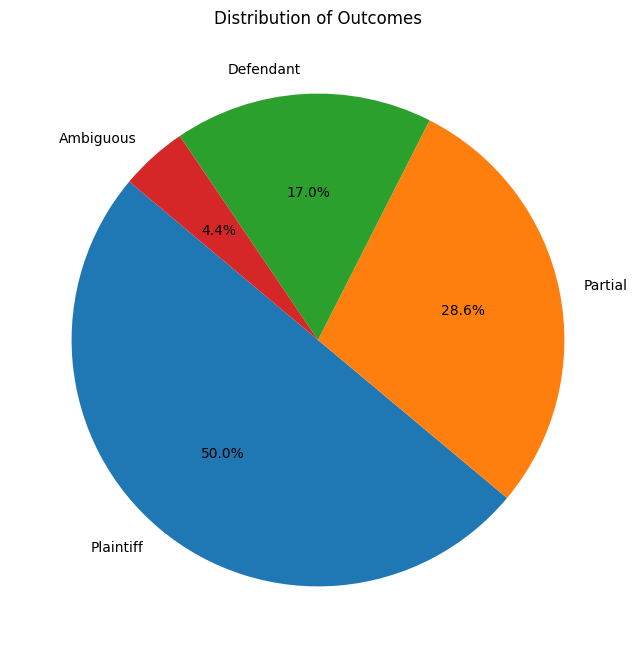

In [9]:
outcome_counts = judgments_1['outcome'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Outcomes')
plt.show()

In [25]:
# Define regex patterns

# Confirmation patterns
confirm_pattern =re.compile(r'c\s*o\s*n\s*f\s*i\s*r\s*m\s*', re.IGNORECASE)
consent_pattern =re.compile(r'c\s*o\s*n\s*s\s*e\s*n\s*t\s*', re.IGNORECASE)

# Reversal patterns

infundada_pattern = re.compile(r'i\s*n\s*f\s*u\s*n\s*d\s*a\s*', re.IGNORECASE)
revoc_pattern = re.compile(r'r\s*e\s*v\s*o\s*c\s*', re.IGNORECASE)
improcedente_pattern = re.compile(r'i\s*m\s*p\s*r\s*o\s*c\s*e\s*d\s*e\s*n\s*t\s*e\s*', re.IGNORECASE)


# Function to classify text based on keywords
def classify_text_2(text):
    if not isinstance(text, str):
        text = str(text) if text is not None else ''
    
    if confirm_pattern.search(text) or consent_pattern.search(text):
        return 'Confirmation'
    
    elif infundada_pattern.search(text) or revoc_pattern.search(text) or improcedente_pattern.search(text):
        return 'Reversal'

    else:
        return 'Ambiguous'
    
judgments_2['outcome'] = (judgments_2['summary'].fillna('') + ' ' + judgments_2['resolution_type'].fillna('')+ ' ' + judgments_2['verdict_text'].fillna('')).apply(classify_text_2)

C:\Users\PC\AppData\Local\Temp\ipykernel_28088\3259700753.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  judgments_2['outcome'] = (judgments_2['summary'].fillna('') + ' ' + judgments_2['resolution_type'].fillna('')+ ' ' + judgments_2['verdict_text'].fillna('')).apply(classify_text_2)


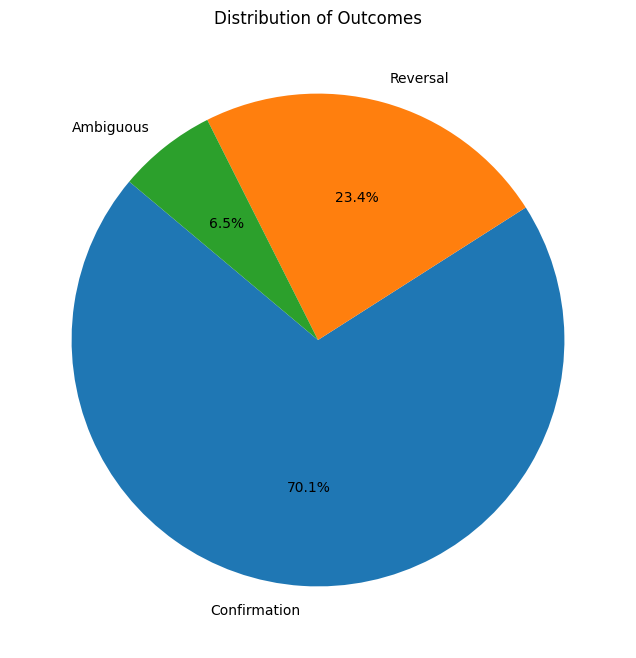

In [26]:
outcome_counts = judgments_2['outcome'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Outcomes')
plt.show()


In [10]:
orders = pd.read_csv(r"D:\Proyectos\amag\amag_orders.csv")
orders = orders[~orders['resolution_type'].str.contains('vista', case=False, na=False)]

def extract_last_n_words(text, n=300):
    # Verifica si el texto es una cadena
    if isinstance(text, str):
        # Divide el texto en palabras
        words = text.split()
        # Extrae las últimas n palabras
        last_n_words = words[-n:]
        # Une las palabras en un solo string
        return ' '.join(last_n_words)
    else:
        return ''  # Retorna una cadena vacía si el texto no es una cadena


# Aplicar la función a la columna del DataFrame
orders['verdict_text'] = orders['opinion_text'].apply(lambda x: extract_last_n_words(x, 300))

orders

,Unnamed: 0,case_file,id,issued_date,resolution_number,resolution_type,notified_date,summary,court,judicial_district,...,procedure_type,law_field,sub_law_field,opinion_text,judge_from_opinion,days_difference,second_instance,score,outcome,verdict_text
0,0,00192-2018-0-0210-JP-FC-01,documentoD.html?nid=XiYqUVUzqiFsisiiTkN,2019-07-19,CINCO,AUTO DESISTIMIENTO,22/07/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tTERCERO. POR...,JUZGADO DE PAZ LETRADO - Sede Pomabamba,ANCASH,...,ESPECIAL,FAMILIA CIVIL,DECLARACION JUDICIAL DE PATERNIDAD EXTRAMATRIM...,juzgado de paz letrado - sede pomabambaexpedie...,MONTES MELENDEZ PAUL JONATHAN,262.0,False,0.999579,NaN,demandada basilia agustina chinchay simóncon f...
1,1,00205-2018-0-0210-JP-FC-01,documentoD.html?nid=YLglBwlLZYliYQL,2019-10-29,CUATRO,AUTO IMPROCEDENTE,30/10/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSE RESUELVE:...,JUZGADO DE PAZ LETRADO - Sede Pomabamba,ANCASH,...,SUMARISIMO,FAMILIA CIVIL,AUMENTO DE ALIMENTOS,juzgado de paz letrado - sede pomabambaexpedie...,MONTES MELENDEZ PAUL JONATHAN,365.0,False,0.999579,NaN,"artículos 424° y425°, del acotado código; segu..."
2,2,00213-2018-0-0201-JP-FC-01,documentoD.html?nid=WPZtMZDnnvyglBmCgByr,2020-04-09,CUATRO,AUTO FINAL,04/09/2020,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tAUTO FINAL\n...,3°JUZGADO DE PAZ LETRADO - Sede Central,ANCASH,...,UNICO,FAMILIA CIVIL,FILIACION,3° juzgado de paz letrado - sede central : 00...,MONTES MELENDEZ PAUL JONATHAN,748.0,False,0.999579,NaN,"la demanda de filiación y alimentos, interpues..."
3,3,00237-2018-0-0210-JP-FC-01,documentoD.html?nid=psApISBFSdvYkzF,2019-09-16,CUATRO,AUTO DESISTIMIENTO,27/09/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tAUTOS Y VIST...,JUZGADO DE PAZ LETRADO - Sede Pomabamba,ANCASH,...,UNICO,FAMILIA CIVIL,ALIMENTOS,juzgado de paz letrado - sede pomabambaexpedie...,MONTES MELENDEZ PAUL JONATHAN,273.0,False,0.999579,NaN,juzgado de paz letrado - sede pomabambaexpedie...
4,4,00086-2018-0-0407-JP-CI-01,documentoD.html?nid=YJpHMRkjYAlZbSeXQPI,2018-05-14,TRES,AUTO FINAL,14/05/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSE RESUELVE:...,JUZGADO DE PAZ LETRADO DE ISLAY,AREQUIPA,...,EJECUTIVO,CIVIL,OBLIGACION DE DAR SUMA DE DINERO,juzgado de paz letrado - s. islay expediente ...,RETAMOSO MAQUERA GLADYS ELIZABETH,125.0,False,NaN,NaN,"artículo 690-d del código procesal civil, por ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10423,10423,00049-2022-0-2402-JR-CI-01,documentoD.html?nid=jEPPmhPOmEQnhEVCQr,2022-03-14,TRES,CONCESORIO APELACION DE AUTO CON EFECTO SUSPEN...,14/03/2022,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tCONCEDE APEL...,JUZGADO CIVIL - SEDE YARINACOCHA,UCAYALI,...,SUMARISIMO,CIVIL,OTORGAMIENTO DE ESCRITURA PUBLICA,juzgado civil - sede yarinacocha expediente :...,CARLOS ENRIQUE DIAZ HERBOZO,35.0,True,0.999601,NaN,pública. segundo .- la resolución referida en ...
10425,10425,00049-2022-0-2402-JR-CI-01,documentoD.html?nid=lFMRxRJCsPwXYORf,2022-02-28,DOS,AUTO,02/03/2022,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tINADMISIBLE ...,JUZGADO CIVIL - SEDE YARINACOCHA,UCAYALI,...,SUMARISIMO,CIVIL,OTORGAMIENTO DE ESCRITURA PUBLICA,juzgado civil - sede yarinacocha expediente :...,DIAZ HERBOZO CARLOS ENRIQUE,21.0,True,NaN,NaN,juzgado civil - sede yarinacocha expediente : ...
10426,10426,00049-2022-0-2402-JR-CI-01,documentoD.html?nid=QoyeGKBlfLOYsSI,2022-02-15,UNO,AUTO IMPROCEDENTE,15/02/2022,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tAUTO IMPROCE...,JUZGADO CIVIL - SEDE YARINACOCHA,UCAYALI,...,SUMARISIMO,CIVIL,OTORGAMIENTO DE ESCRITURA PUBLICA,juzgado civil - sede yarinacocha expediente : ...,CARLOS ENRIQUE DIAZ HERBOZO,8.0,True,0.999601,NaN,del derecho; 4. no exista conexión lógica entr...
10428,10428,00089-2022-0-2402-JR-CI-01,documentoD.html?nid=yhBEFfmWCrJrSKxSeE,2022-05-18,DOS,AUTO QUE RECHAZA LA DEMANDA,18/05/2022,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tA)\tRECHÁCES...,JUZGADO CIVIL - SEDE YARINACOCHA,UCAYALI,...,CONOCIMIENTO,CIVIL,REIVINDICACION,expediente : 00089-2022-0-2022-2402-jr-ci-01 ...,DIAZ HERBOZO C

In [11]:
# Settlement patterns

conciliacion_pattern = re.compile(r'c\s*o\s*n\s*c\s*i\s*l\s*i\s*a\s*', re.IGNORECASE)
transaccion_pattern = re.compile(r't\s*r\s*a\s*n\s*s\s*a\s*c\s*c\s*i\s*o\s*n\s*', re.IGNORECASE)

# Dropped by plaintiff patterns

abandono_pattern = re.compile(r'a\s*b\s*a\s*n\s*d\s*o\s*n\s*o\s*', re.IGNORECASE)
desistimiento_pattern = re.compile(r'd\s*e\s*s\s*i\s*s\s*t\s*i\s*m\s*i\s*e\s*n\s*t\s*o\s*', re.IGNORECASE)
inasist_pattern = re.compile(r'i\s*n\s*a\s*s\s*i\s*s\s*t\s*', re.IGNORECASE)


# Negative patterns

infundada_pattern = re.compile(r'i\s*n\s*f\s*u\s*n\s*d\s*a\s*', re.IGNORECASE)
improcedente_pattern = re.compile(r'i\s*m\s*p\s*r\s*o\s*c\s*e\s*d\s*e\s*n\s*t\s*e\s*', re.IGNORECASE)
rechazar_pattern = re.compile(r'r\s*e\s*c\s*h\s*a\s*z\s*a\s*r\s*', re.IGNORECASE)
nulidad_pattern = re.compile(r'n\s*u\s*l\s*i\s*d\s*a\s*d\s*', re.IGNORECASE)    
incompentencia_pattern = re.compile(r'i\s*n\s*c\s*o\s*m\s*p\s*e\s*t\s*e\s*n\s*c\s*i\s*a\s*', re.IGNORECASE)
sin_declaración_pattern = re.compile(r's\s*i\s*n\s*d\s*e\s*c\s*l\s*a\s*r\s*a\s*c\s*i\s*ó\s*n\s*', re.IGNORECASE)

# Partial patterns

fundada_en_parte_pattern = re.compile(r'f\s*u\s*n\s*d\s*a\s*d\s*a\s*e\s*n\s*p\s*a\s*r\s*t\s*e\s*', re.IGNORECASE)

# Positive patterns

fundada_pattern = re.compile(r'f\s*u\s*n\s*d\s*a\s*d\s*a\s*', re.IGNORECASE)
llevar_adelante_pattern = re.compile(r'l\s*l\s*e\s*v\s*a\s*r\s*\s*a\s*d\s*e\s*l\s*a\s*n\s*t\s*e\s*', re.IGNORECASE)
allana_pattern = re.compile(r'a\s*l\s*l\s*a\s*n\s*a\s*', re.IGNORECASE)
adelante_pattern = re.compile(r'a\s*d\s*e\s*l\s*a\s*n\s*t\s*e\s*', re.IGNORECASE)

# Function to classify text based on keywords
def classify_text(text):
    if not isinstance(text, str):
        text = str(text) if text is not None else ''
    
    if conciliacion_pattern.search(text) or transaccion_pattern.search(text):
        return 'Settlement'
    
    elif abandono_pattern.search(text) or desistimiento_pattern.search(text) or inasist_pattern.search(text):
        return 'Dropped by Plaintiff'
    
    elif fundada_en_parte_pattern.search(text):
        return 'Partial'
    
    elif infundada_pattern.search(text) or improcedente_pattern.search(text) or rechazar_pattern.search(text) or nulidad_pattern.search(text) or incompentencia_pattern.search(text) or sin_declaración_pattern.search(text):
        return 'Defendant'
    
    elif fundada_pattern.search(text) or llevar_adelante_pattern.search(text) or allana_pattern.search(text) or adelante_pattern.search(text):
        return 'Plaintiff'

    else:
        return 'Ambiguous'

In [12]:
orders['outcome'] = (orders['summary'].fillna('') + ' ' + orders['resolution_type'].fillna('')+ ' ' + orders['verdict_text'].fillna('')).apply(classify_text)

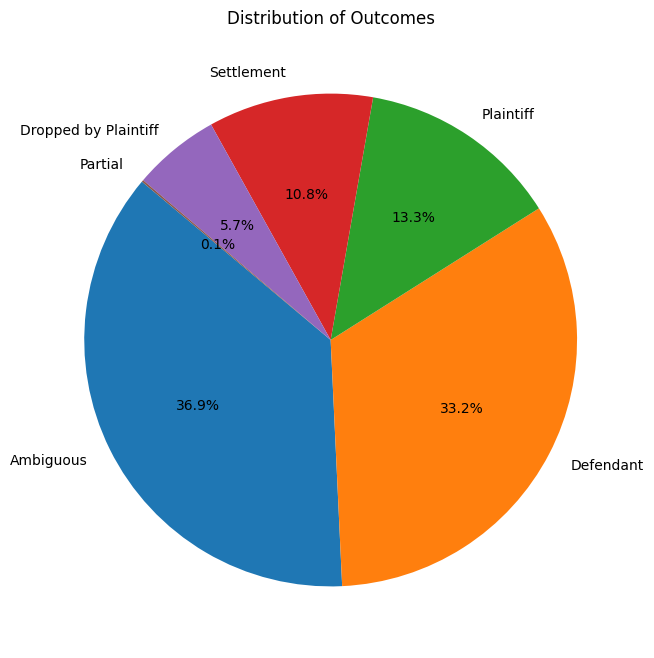

In [13]:
outcome_counts = orders['outcome'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Outcomes')
plt.show()


In [14]:
label_counts = orders['outcome'].value_counts()
label_counts

Ambiguous               3697
Defendant               3333
Plaintiff               1331
Settlement              1086
Dropped by Plaintiff     572
Partial                   12
Name: outcome, dtype: int64

In [15]:
orders_a = orders[orders['outcome'].str.contains('Ambiguous', case=False, na=False)]
orders_a

,Unnamed: 0,case_file,id,issued_date,resolution_number,resolution_type,notified_date,summary,court,judicial_district,...,procedure_type,law_field,sub_law_field,opinion_text,judge_from_opinion,days_difference,second_instance,score,outcome,verdict_text
2,2,00213-2018-0-0201-JP-FC-01,documentoD.html?nid=WPZtMZDnnvyglBmCgByr,2020-04-09,CUATRO,AUTO FINAL,04/09/2020,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tAUTO FINAL\n...,3°JUZGADO DE PAZ LETRADO - Sede Central,ANCASH,...,UNICO,FAMILIA CIVIL,FILIACION,3° juzgado de paz letrado - sede central : 00...,MONTES MELENDEZ PAUL JONATHAN,748.0,False,0.999579,Ambiguous,"la demanda de filiación y alimentos, interpues..."
24,24,00084-2018-0-0403-JM-CI-01,documentoD.html?nid=KjWQsVBLSrozAuXZB,2020-11-25,SEIS,AUTO FINAL,25/11/2020,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t1) DECLARAR ...,JUZGADO MIXTO DE CARAVELI,AREQUIPA,...,CONOCIMIENTO,CIVIL,PARTICION DE HERENCIA,: declaratoria de heredero : mollo lloque mig...,MOLLO LLOQUE MIGUEL RUBEN,778.0,False,NaN,Ambiguous,: declaratoria de heredero : mollo lloque migu...
28,28,00099-2018-0-0403-JM-CI-01,documentoD.html?nid=cRNQhhAlkIGvAQAV,2020-10-15,VEINTIUNO,AUTO DE ARCHIVO DEFINITIVO,15/10/2020,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDECLARAR CON...,JUZGADO MIXTO DE CARAVELI,AREQUIPA,...,SUMARISIMO,CIVIL,INTERDICTO,juzgado mixto de caraveliexpediente : 00...,MOLLO LLOQUE MIGUEL RUBEN,687.0,False,0.999582,Ambiguous,juzgado mixto de caraveliexpediente : 00099-20...
31,31,00037-2018-0-0403-JM-FC-01,documentoD.html?nid=YezTVirrARVJbAEaVP,2018-05-03,UNO,AUTO FINAL,15/03/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t1) DICTAR ME...,JUZGADO MIXTO DE CARAVELI,AREQUIPA,...,UNICO,FAMILIA CIVIL,VIOLENCIA FAMILIAR,juzgado mixto - sede caravelíexpediente ...,MIGUEL RUBEN MOLLO LLOQUE,71.0,False,0.999581,Ambiguous,la presente resolución sinconvocar a las parte...
32,32,00038-2018-0-0403-JM-FC-01,documentoD.html?nid=mrQmwkfYPADqLmtCvfg,2018-03-15,UNO,AUTO FINAL,15/03/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t1) DICTAR ME...,JUZGADO MIXTO DE CARAVELI,AREQUIPA,...,UNICO,FAMILIA CIVIL,VIOLENCIA FAMILIAR,juzgado mixto - sede caravelíexpediente ...,MIGUEL RUBEN MOLLO LLOQUE,22.0,False,0.999581,Ambiguous,espalda optando por salirse la denunciante de ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10398,10398,00020-2022-0-1615-JM-LA-01,documentoD.html?nid=SQfqPoBCudKeLErJ,2022-07-22,UNO,AUTO ADMISORIO,22/07/2022,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tADMITE DEMAN...,JUZGADO MIXTO -Cascas,LA LIBERTAD,...,ESPECIAL,LABORAL,ACCION CONTENCIOSA ADMINISTRATIVA,juzgado mixto -cascas expediente : 00020-2022...,SANCHEZ RAMIREZ JORGE LUIS,18.0,True,0.999577,Ambiguous,"cierto y manifiesto, de una necesidad imposter..."
10400,10400,00004-2022-0-2113-JM-CI-01,documentoD.html?nid=PBNTVyJXFfzZeXqeAycS,2022-05-14,CUATRO,AUTO,15/05/2022,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSE RESUELVE:...,1° JUZGADO MIXTO - MBJ YUNGUYO,PUNO,...,PROCEDIMIENTOS CIVILES,CIVIL,OBLIGACION DE DAR SUMA DE DINERO,1° juzgado mixto - mbj yunguyo expediente : ...,JUAN MANUEL FLORES SANCHEZ,87.0,True,0.999580,Ambiguous,demandada bethsabe rosalía mamani ahumada endo...
10407,10407,00005-2022-0-2113-JM-CI-01,documentoD.html?nid=LQPKVdhXcOsdBhLrYLC,2022-05-14,CUATRO,AUTO,15/05/2022,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSE RESUELVE:...,1° JUZGADO MIXTO - MBJ YUNGUYO,PUNO,...,PROCEDIMIENTOS CIVILES,CIVIL,OBLIGACION DE DAR SUMA DE DINERO,1° juzgado mixto - mbj yunguyo expediente : 0...,JUAN MANUEL FLORES SANCHEZ,87.0,True,0.999580,Ambiguous,la mujer demandada bethsabe rosalía mamani ahu...
10420,10420,00079-2022-0-2402-JP-CI-01,documentoD.html?nid=BHKpchoXnFlbXVg,2022-10-20,DOS,AUTO,20/10/2022,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSE RESUELVE:...,JUZGADO CIVIL - SEDE YARINACOCHA,UCAYALI,...,SUMARISIMO,CIVIL,OBLIGACION DE DAR SUMA DE DINERO,corte superior de justicia de ucayali juzgado ...,DIAZ HERBOZO CARLOS ENRIQUE,76.0,True,NaN,Ambiguous,corte superior de justicia de ucayali juzgado ...


In [21]:
cell_value = orders_a.loc[2, 'verdict_text']  # Reads the value in the second row, 'City' column
cell_value

'la demanda de filiación y alimentos, interpuesta por angela giovana macedo penadillo contra cesar augusto molina caushi, sin que hasta la fecha se haya logrado la 1 cappelletti mauro y garth, bryant. el acceso a la justicia: la tendencia en el movimiento mundial para hacer efectivos los derechos, fondo de cultura económica, méxico, 1998, pp. 9-10. ubicación del hombre demandado para su notificación con el auto admisorio, demanda y anexos; no habiendo la parte demandante brindando las facilidades del caso desde aquella oportunidad, pese al requerimiento de precisar la dirección del hombre demandado, ante la imposibilidad de la notificación, tal como se aprecia de la constancia de notificación efectuada a la parte demandante que obra a folios veinte. tercero: si bien es cierto, toda persona tiene el derecho a la tutela jurisdiccional efectiva, sin embargo esta no puede ser absoluta, pues son las partes interesadas quienes tienen que coadyuvar con el trámite de los expedientes, lo que no

In [18]:
orders_na = orders[~orders['outcome'].str.contains('Ambiguous', case=False, na=False)]
orders_na

,Unnamed: 0,case_file,id,issued_date,resolution_number,resolution_type,notified_date,summary,court,judicial_district,...,procedure_type,law_field,sub_law_field,opinion_text,judge_from_opinion,days_difference,second_instance,score,outcome,verdict_text
0,0,00192-2018-0-0210-JP-FC-01,documentoD.html?nid=XiYqUVUzqiFsisiiTkN,2019-07-19,CINCO,AUTO DESISTIMIENTO,22/07/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tTERCERO. POR...,JUZGADO DE PAZ LETRADO - Sede Pomabamba,ANCASH,...,ESPECIAL,FAMILIA CIVIL,DECLARACION JUDICIAL DE PATERNIDAD EXTRAMATRIM...,juzgado de paz letrado - sede pomabambaexpedie...,MONTES MELENDEZ PAUL JONATHAN,262.0,False,0.999579,Dropped by Plaintiff,demandada basilia agustina chinchay simóncon f...
1,1,00205-2018-0-0210-JP-FC-01,documentoD.html?nid=YLglBwlLZYliYQL,2019-10-29,CUATRO,AUTO IMPROCEDENTE,30/10/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSE RESUELVE:...,JUZGADO DE PAZ LETRADO - Sede Pomabamba,ANCASH,...,SUMARISIMO,FAMILIA CIVIL,AUMENTO DE ALIMENTOS,juzgado de paz letrado - sede pomabambaexpedie...,MONTES MELENDEZ PAUL JONATHAN,365.0,False,0.999579,Defendant,"artículos 424° y425°, del acotado código; segu..."
3,3,00237-2018-0-0210-JP-FC-01,documentoD.html?nid=psApISBFSdvYkzF,2019-09-16,CUATRO,AUTO DESISTIMIENTO,27/09/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tAUTOS Y VIST...,JUZGADO DE PAZ LETRADO - Sede Pomabamba,ANCASH,...,UNICO,FAMILIA CIVIL,ALIMENTOS,juzgado de paz letrado - sede pomabambaexpedie...,MONTES MELENDEZ PAUL JONATHAN,273.0,False,0.999579,Settlement,juzgado de paz letrado - sede pomabambaexpedie...
4,4,00086-2018-0-0407-JP-CI-01,documentoD.html?nid=YJpHMRkjYAlZbSeXQPI,2018-05-14,TRES,AUTO FINAL,14/05/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSE RESUELVE:...,JUZGADO DE PAZ LETRADO DE ISLAY,AREQUIPA,...,EJECUTIVO,CIVIL,OBLIGACION DE DAR SUMA DE DINERO,juzgado de paz letrado - s. islay expediente ...,RETAMOSO MAQUERA GLADYS ELIZABETH,125.0,False,NaN,Plaintiff,"artículo 690-d del código procesal civil, por ..."
5,5,00169-2018-0-0401-JP-CI-02,documentoD.html?nid=sKuFwIlNwyGmfXEuUYO,2019-10-16,OCHO,AUTO FINAL,16/10/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tABANDONO DEL...,10º JUZGADO CIVIL,AREQUIPA,...,EJECUTIVO,CIVIL,OBLIGACION DE DAR SUMA DE DINERO,2º juzgado de paz letrado - civil expediente ...,SALAS FLORES ZORAIDA JULIA,545.0,False,NaN,Dropped by Plaintiff,2º juzgado de paz letrado - civil expediente m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10422,10422,00011-2022-0-2404-JP-LA-01,documentoD.html?nid=FYRsAbWCshCTdHncZwx,2023-01-25,CINCO,AUTO,25/01/2023,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tRESOLUCION N...,JUZGADO MIXTO - Sede Aguaytia,UCAYALI,...,EJECUCION,LABORAL,OBLIGACION DE DAR SUMA DE DINERO INICIADAS POR...,juzgado de paz letrado - sede aguaytía expe...,CRUZADO MEJIA MARTIN VALDEMAR,350.0,True,0.999583,Defendant,"el propósito de que sea anulado o revocada, to..."
10425,10425,00049-2022-0-2402-JR-CI-01,documentoD.html?nid=lFMRxRJCsPwXYORf,2022-02-28,DOS,AUTO,02/03/2022,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tINADMISIBLE ...,JUZGADO CIVIL - SEDE YARINACOCHA,UCAYALI,...,SUMARISIMO,CIVIL,OTORGAMIENTO DE ESCRITURA PUBLICA,juzgado civil - sede yarinacocha expediente :...,DIAZ HERBOZO CARLOS ENRIQUE,21.0,True,NaN,Defendant,juzgado civil - sede yarinacocha expediente : ...
10426,10426,00049-2022-0-2402-JR-CI-01,documentoD.html?nid=QoyeGKBlfLOYsSI,2022-02-15,UNO,AUTO IMPROCEDENTE,15/02/2022,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tAUTO IMPROCE...,JUZGADO CIVIL - SEDE YARINACOCHA,UCAYALI,...,SUMARISIMO,CIVIL,OTORGAMIENTO DE ESCRITURA PUBLICA,juzgado civil - sede yarinacocha expediente : ...,CARLOS ENRIQUE DIAZ HERBOZO,8.0,True,0.999601,Defendant,del derecho; 4. no exista conexión lógica entr...
10428,10428,00089-2022-0-2402-JR-CI-01,documentoD.html?nid=yhBEFfmWCrJrSKxSeE,2022-05-18,DOS,AUTO QUE RECHAZA LA DEMANDA,18/05/2022,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tA)\tRECHÁCES...,JUZGADO CIVIL - SEDE YARINACOCHA,UCAYALI,...,CONOCIMIENTO,CIVIL,REIVINDICACION,expediente : 00089-2022-0-2022-2

In [20]:
label_counts = orders_na['sub_law_field'].value_counts()
label_counts.head(20)

OBLIGACION DE DAR SUMA DE DINERO                                               1153
ALIMENTOS                                                                       701
EJECUCION DE ACTA DE CONCILIACION                                               427
VIOLENCIA FAMILIAR                                                              377
ACCION DE AMPARO                                                                350
OBLIGACION DE DAR SUMA DE DINERO INICIADAS POR AFPS                             338
RECTIFICACION DE PARTIDA                                                        295
EJECUCION DE GARANTIAS                                                          198
DESALOJO                                                                        141
AUMENTO DE ALIMENTOS                                                            136
NULIDAD DE ACTO JURIDICO                                                        128
PAGO DE BENEFICIOS SOCIALES Y/O INDEMNIZACION U OTROS BENEFICIOS ECONOMICOS 

In [17]:
label_counts = orders_a['sub_law_field'].value_counts()
label_counts

VIOLENCIA FAMILIAR                                                   1765
VIOLENCIA CONTRA LAS MUJERES Y LOS INTEGRANTES DEL GRUPO FAMILIAR     582
OBLIGACION DE DAR SUMA DE DINERO                                      268
ALIMENTOS                                                             139
RECTIFICACION DE PARTIDA                                               89
                                                                     ... 
OBLIGACIONES DE DAR HASTA 50 URP                                        1
IMPUGNACION DE DESPIDO                                                  1
CESE DE ACTOS DE HOSTILIDAD DEL EMPLEADOR                               1
DECLARACION DE MUERTE PRESUNTA                                          1
ANULACION DE LAUDOS ARBITRALES                                          1
Name: sub_law_field, Length: 107, dtype: int64